  #                             **GERMAN CREDIT CASE STUDY**

 **PROBLEM STATEMENT**                     

**Context**

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding whom to approve the loan and whom not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application. In this dataset, each entry represents a person who takes credit from a bank. Each person is classified as a good or bad credit risk according to the set of attributes.

**Objective:**

The objective is to build a predictive model on this data to help the bank decide on whether to approve a loan to a prospective applicant.


**Dataset**

*   Age (Numeric: Age in years)
*   Sex (Categories: male, female)
*   Job (Categories: unskilled and non-resident, unskilled and resident, skilled, highly skilled)
*   Housing (Categories: own, rent, or free)
*   Saving accounts (Categories: little, moderate, quite rich, rich)
*   Checking account (Categories: little, moderate, rich)
*   Credit amount (Numeric: Amount of credit in DM - Deutsche Mark)
*   Duration (Numeric: Duration for which the credit is given in months)
*   Purpose (Categories: car, furniture/equipment,radio/TV, domestic appliances, repairs, education, business, vacation/others)
*   Risk (0 - Person is not at risk, 1 - Person is at risk(defaulter))









**Data Wrangling**

In [95]:
# Load necessary libraries
library(dplyr)
# Load the dataset
data <- read.csv("/content/German_Credit (1).csv")
data

Age,Sex,Job,Housing,Saving.accounts,Checking.account,Credit.amount,Duration,Risk,Purpose
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
67,male,skilled,own,little,little,1169,6,0,radio/TV
22,female,skilled,own,little,moderate,5951,48,1,radio/TV
49,male,unskilled_and_non-resident,own,little,little,2096,12,0,education
45,male,skilled,free,little,little,7882,42,0,furniture/equipment
53,male,skilled,free,little,little,4870,24,1,car
35,male,unskilled_and_non-resident,free,little,moderate,9055,36,0,education
53,male,skilled,own,quite rich,moderate,2835,24,0,furniture/equipment
35,male,highly skilled,rent,little,moderate,6948,36,0,car
61,male,unskilled_and_non-resident,own,rich,moderate,3059,12,0,radio/TV


In [96]:
# Check the structure of the dataset
str(data)

'data.frame':	1000 obs. of  10 variables:
 $ Age             : int  67 22 49 45 53 35 53 35 61 28 ...
 $ Sex             : chr  "male" "female" "male" "male" ...
 $ Job             : chr  "skilled" "skilled" "unskilled_and_non-resident" "skilled" ...
 $ Housing         : chr  "own" "own" "own" "free" ...
 $ Saving.accounts : chr  "little" "little" "little" "little" ...
 $ Checking.account: chr  "little" "moderate" "little" "little" ...
 $ Credit.amount   : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ Duration        : int  6 48 12 42 24 36 24 36 12 30 ...
 $ Risk            : int  0 1 0 0 1 0 0 0 0 1 ...
 $ Purpose         : chr  "radio/TV" "radio/TV" "education" "furniture/equipment" ...


In [98]:
# Check for missing values
sum(is.na(data))

[1] 0

In [99]:
# Check for duplicates
data <- distinct(data)


In [100]:
# Explore unique values in each categorical variable
unique_values <- lapply(data[,sapply(data, is.character)], unique)
print(unique_values)

$Sex
[1] "male"   "female"

$Job
[1] "skilled"                    "unskilled_and_non-resident"
[3] "highly skilled"            

$Housing
[1] "own"  "free" "rent"

$Saving.accounts
[1] "little"     "quite rich" "rich"       "moderate"  

$Checking.account
[1] "little"   "moderate" "rich"    

$Purpose
[1] "radio/TV"            "education"           "furniture/equipment"
[4] "car"                 "business"            "domestic appliances"
[7] "repairs"             "vacation/others"    



**Exploratory Data Analysis (EDA)**

In [102]:
# Summary statistics
summary(data)

      Age            Sex                Job              Housing         
 Min.   :19.00   Length:1000        Length:1000        Length:1000       
 1st Qu.:27.00   Class :character   Class :character   Class :character  
 Median :33.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :35.55                                                           
 3rd Qu.:42.00                                                           
 Max.   :75.00                                                           
 Saving.accounts    Checking.account   Credit.amount      Duration   
 Length:1000        Length:1000        Min.   :  250   Min.   : 4.0  
 Class :character   Class :character   1st Qu.: 1366   1st Qu.:12.0  
 Mode  :character   Mode  :character   Median : 2320   Median :18.0  
                                       Mean   : 3271   Mean   :20.9  
                                       3rd Qu.: 3972   3rd Qu.:24.0  
                                       Max.   :18424   Max.   

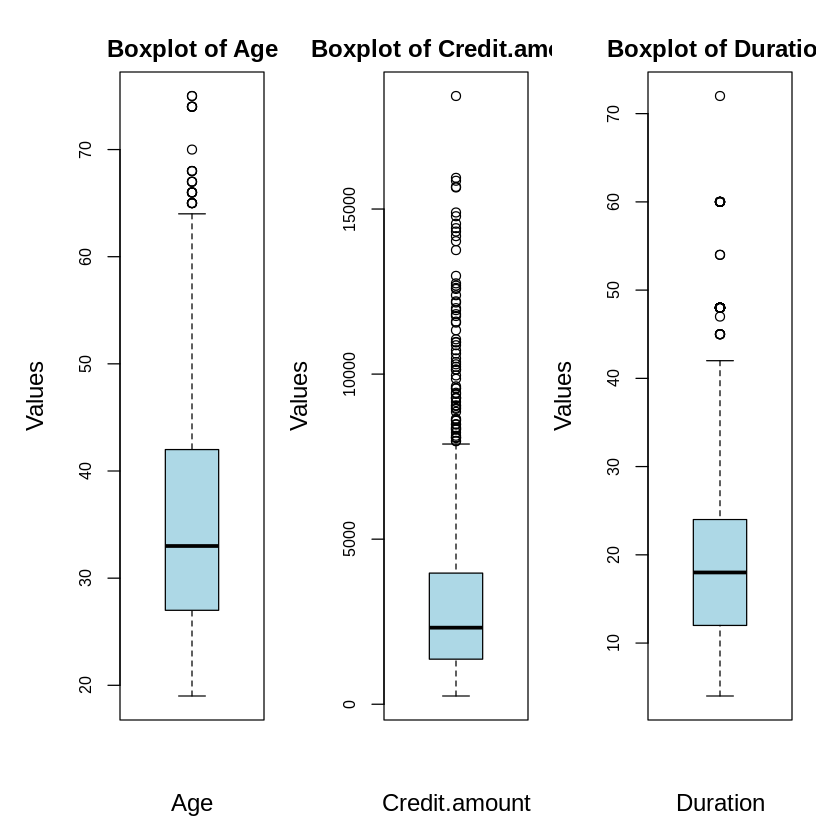

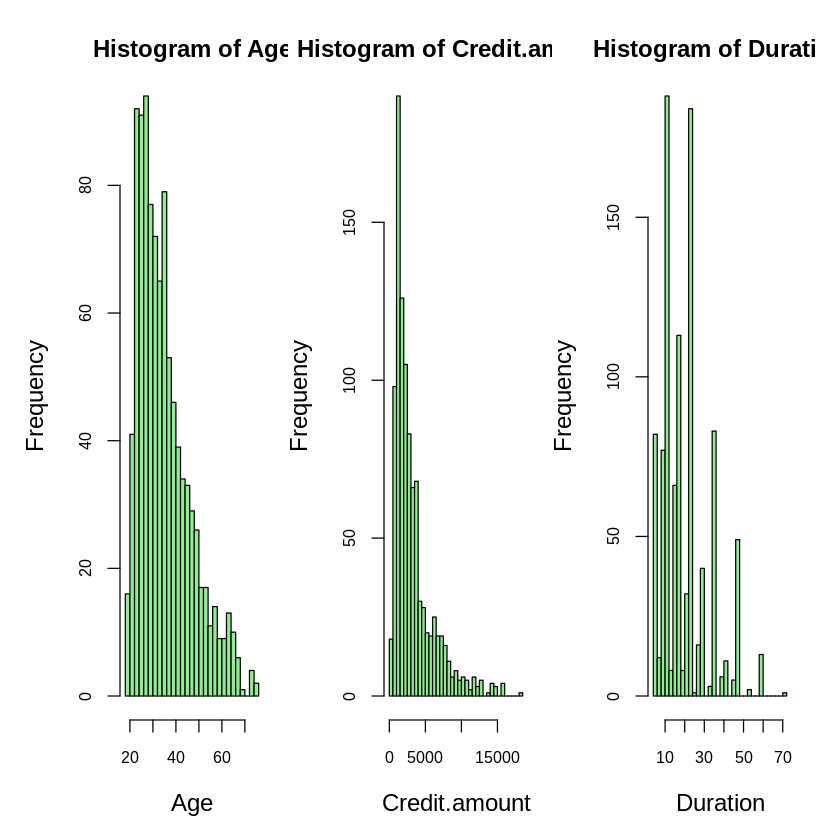

In [103]:
# Load necessary libraries
library(ggplot2)

columns_to_plot <- c("Age", "Credit.amount", "Duration")

# Adjust margins to allow more space for each plot (bottom, left, top, right)
par(mfrow = c(1, 3), mar = c(4, 4, 2, 1), oma = c(1, 1, 1, 1), cex = 1)

# Create Boxplots for the three columns, with adjusted plot margins
for (col in columns_to_plot) {
  # Check for NA values and handle them
  if(all(is.na(data[[col]]))){
    print(paste("Column", col, "has all NA values. Skipping boxplot."))
    plot.new() # Create an empty plot
    title(main = paste("Boxplot of", col))
  } else {
    boxplot(data[[col]],
            main = paste("Boxplot of", col),
            xlab = col,
            ylab = "Values",
            col = "lightblue",
            cex.axis = 0.8,
            cex.lab = 1.2)
  }
}

# Reset margins and plotting area for histograms
par(mfrow = c(1, 3), mar = c(4, 4, 2, 1), oma = c(1, 1, 1, 1), cex = 1)

# Create Histograms for the three columns, with adjusted plot margins
for (col in columns_to_plot) {
  # Check for NA values and handle them
  if(all(is.na(data[[col]]))){
    print(paste("Column", col, "has all NA values. Skipping histogram."))
    plot.new()
    title(main = paste("Histogram of", col)) # Add a title to the empty plot
  } else {
    hist(data[[col]],
         main = paste("Histogram of", col),
         xlab = col,
         ylab = "Frequency",
         col = "lightgreen",
         breaks = 30,
         cex.axis = 0.8,
         cex.lab = 1.2)
  }
}

**UNIVARIATE ANALYSIS**

**Bar Chart Of Categorical Variables**

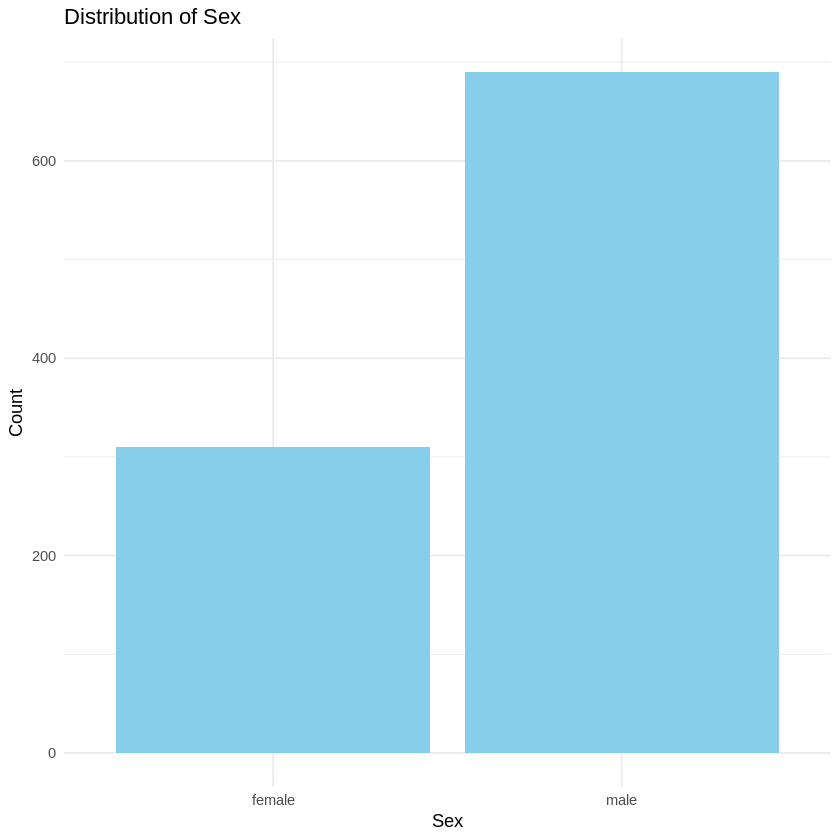

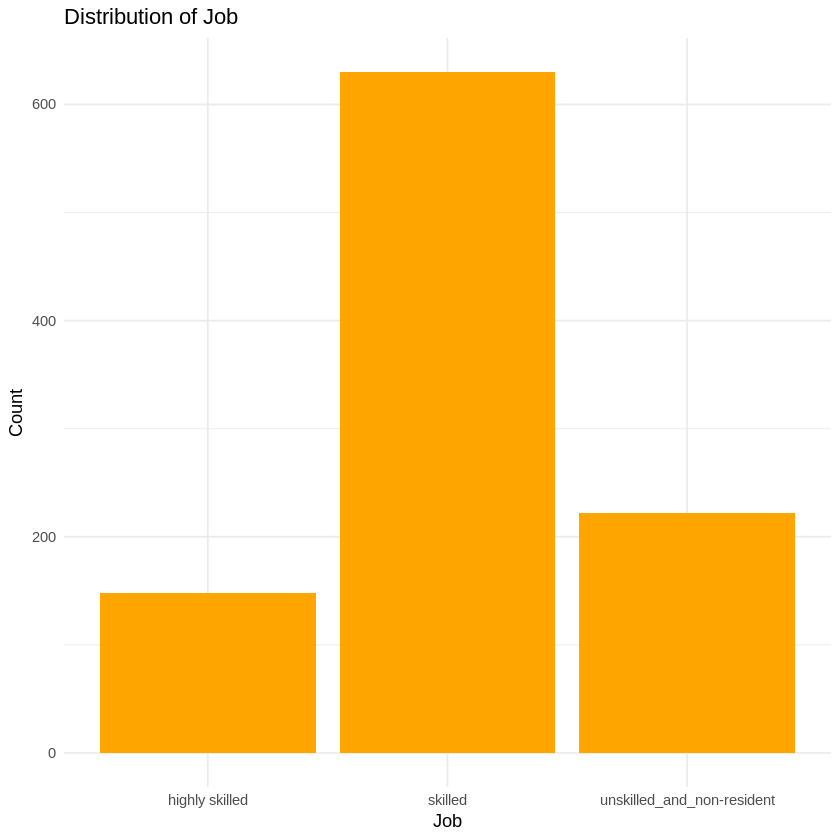

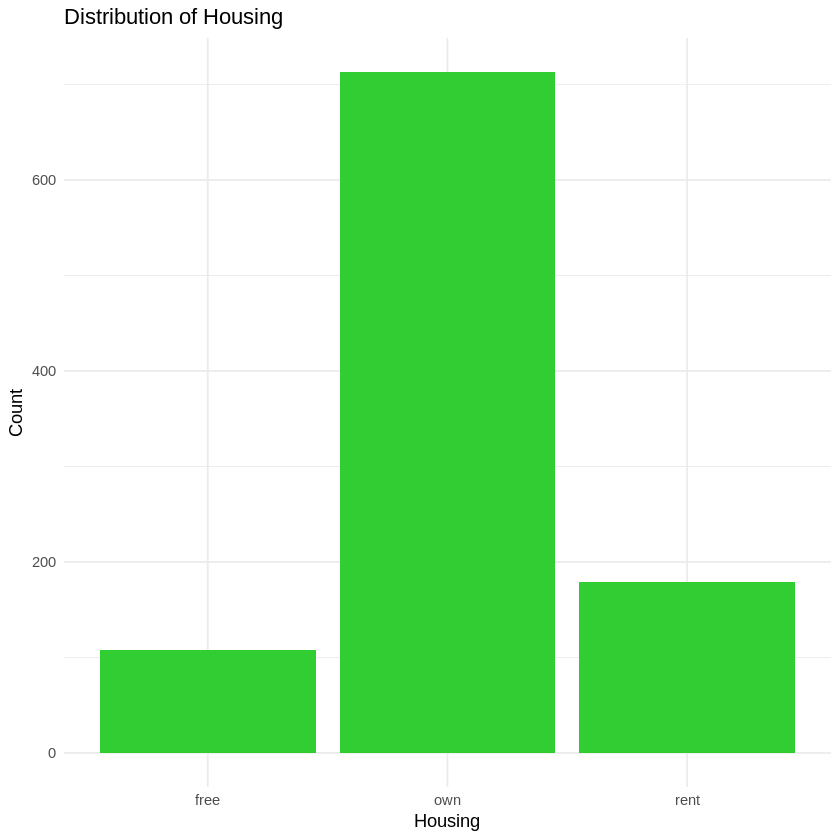

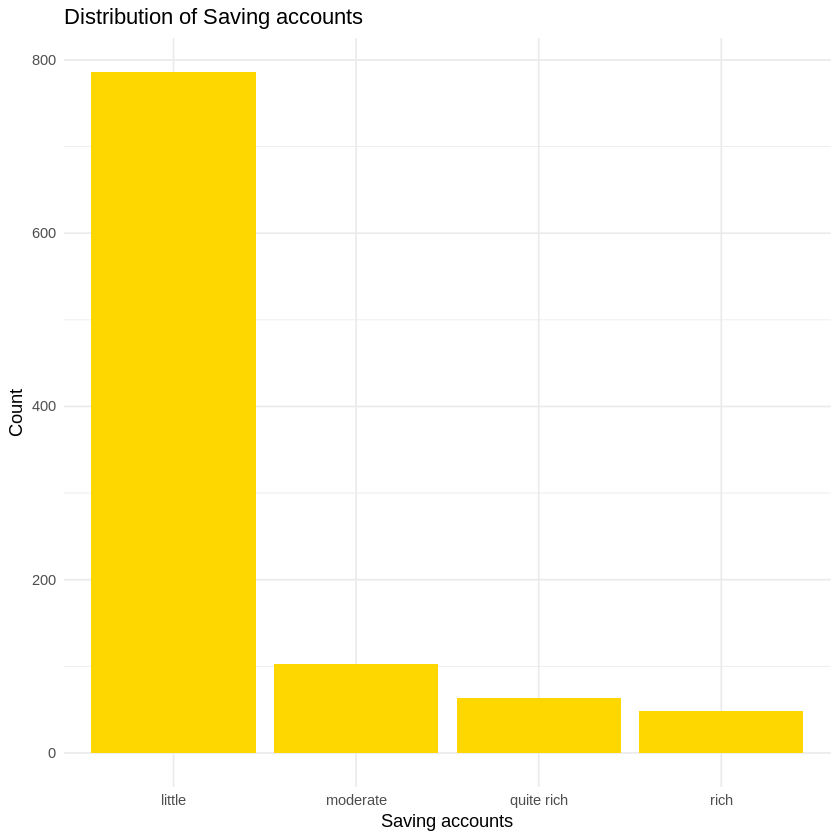

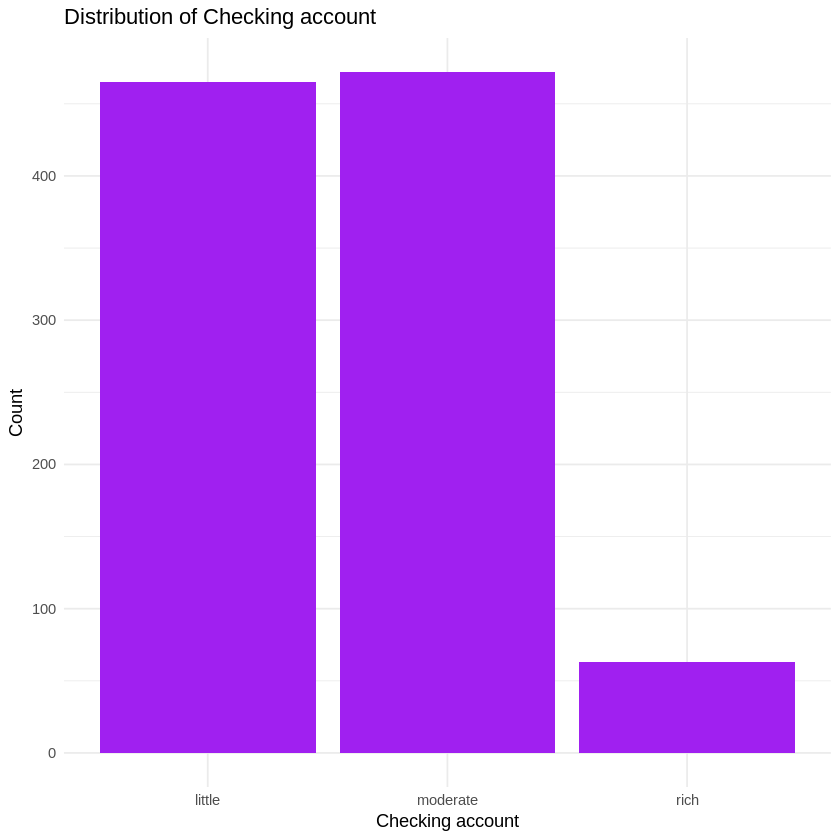

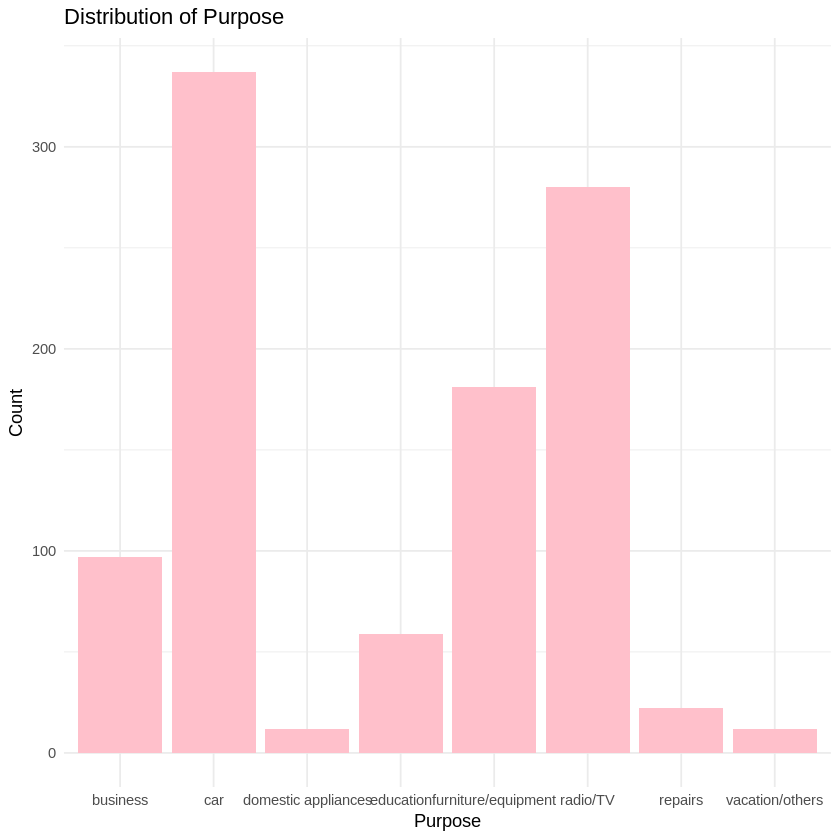

In [104]:
# Load the ggplot2 library
library(ggplot2)


# Plot a bar chart of the categorical variable

ggplot(data, aes(x = Sex)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Distribution of Sex", x = "Sex", y = "Count") +
  theme_minimal()

ggplot(data, aes(x = Job)) +
  geom_bar(fill = "Orange") +
  labs(title = "Distribution of Job", x = "Job", y = "Count") +
  theme_minimal()

ggplot(data, aes(x = Housing)) +
  geom_bar(fill = "Lime Green") +
  labs(title = "Distribution of Housing", x = "Housing", y = "Count") +
  theme_minimal()

ggplot(data, aes(x = Saving.accounts)) +
  geom_bar(fill = "Gold") +
  labs(title = "Distribution of Saving accounts", x = "Saving accounts", y = "Count") +
  theme_minimal()

ggplot(data, aes(x = Checking.account)) +
  geom_bar(fill = "Purple") +
  labs(title = "Distribution of Checking account ", x = "Checking account", y = "Count") +
  theme_minimal()

ggplot(data, aes(x = Purpose)) +
  geom_bar(fill = "Pink") +
  labs(title = "Distribution of Purpose", x = "Purpose", y = "Count") +
  theme_minimal()


**Histogram Of Numerical Variables**

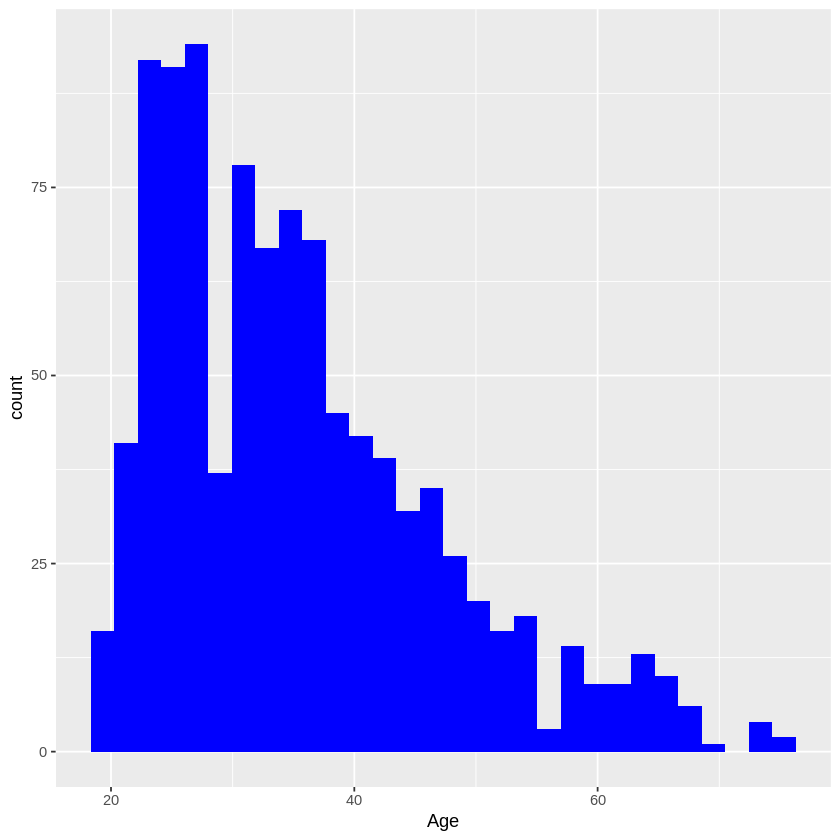

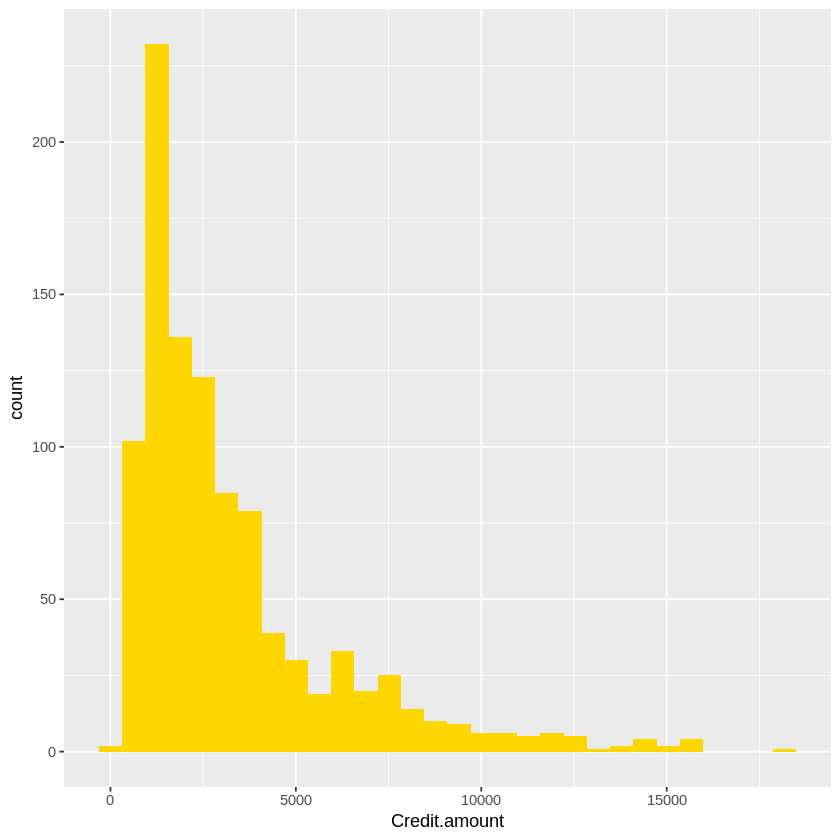

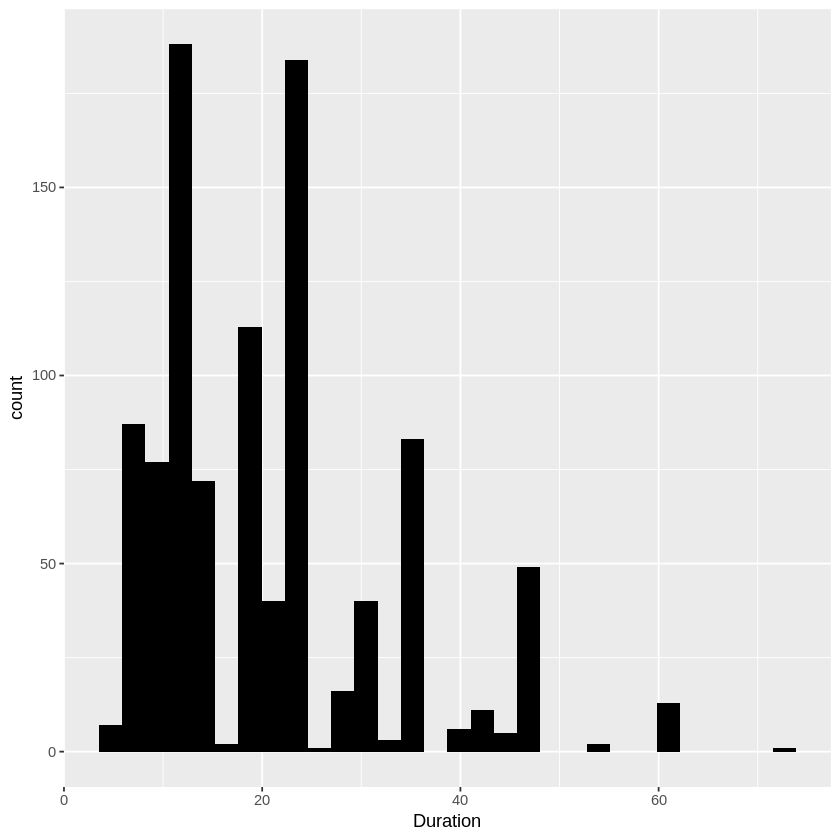

In [105]:

library(ggplot2)

# Age distribution
ggplot(data, aes(x=Age)) + geom_histogram(fill="blue", bins=30)

# Credit.amount distribution
ggplot(data, aes(x=Credit.amount)) + geom_histogram(fill="Gold", bins=30)

# Duration distribution
ggplot(data, aes(x=Duration)) + geom_histogram(fill="black", bins=30)


**BIVARIATE ANALYSIS**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



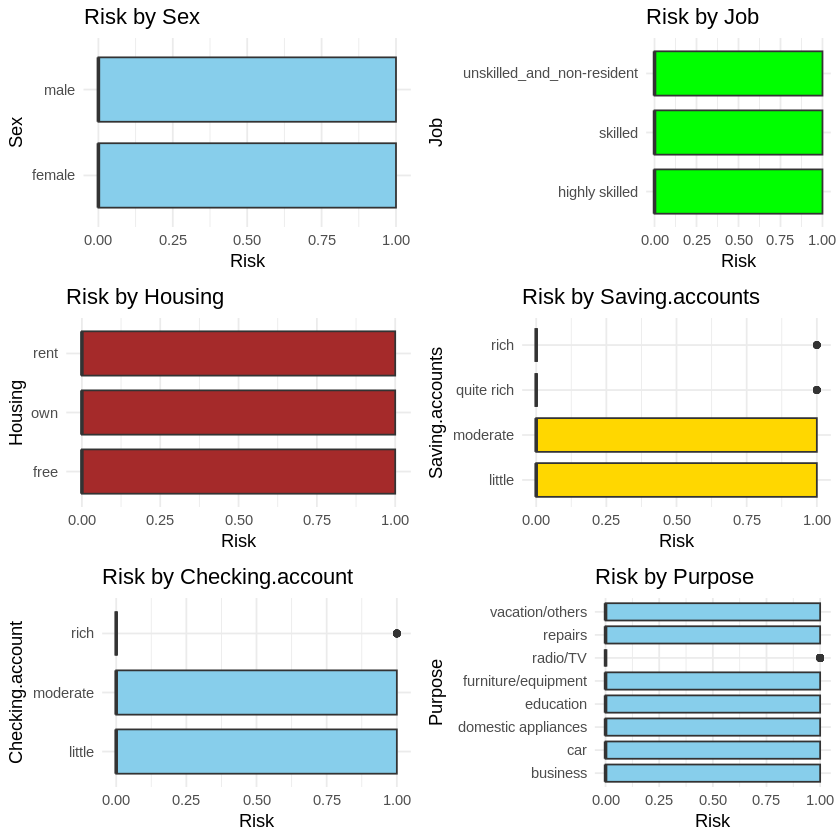

In [106]:
install.packages("gridExtra")
library(ggplot2)
library(gridExtra)


p1 <- ggplot(data, aes(x = Risk, y = Sex)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Risk by Sex", x = "Risk", y = "Sex") +
  theme_minimal()

p2 <- ggplot(data, aes(x = Risk, y = Job)) +
  geom_boxplot(fill = "green") +
  labs(title = "Risk by Job", x = "Risk", y = "Job") +
  theme_minimal()

p3 <- ggplot(data, aes(x = Risk, y = Housing)) +
  geom_boxplot(fill = "brown") +
  labs(title = "Risk by Housing", x = "Risk", y = "Housing") +
  theme_minimal()

p4 <- ggplot(data, aes(x = Risk, y = Saving.accounts)) +
  geom_boxplot(fill = "Gold") +
  labs(title = "Risk by Saving.accounts", x = "Risk", y = "Saving.accounts") +
  theme_minimal()

p5 <- ggplot(data, aes(x = Risk, y = Checking.account)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Risk by Checking.account", x = "Risk", y = "Checking.account") +
  theme_minimal()

p6 <- ggplot(data, aes(x = Risk, y = Purpose)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Risk by Purpose", x = "Risk", y = "Purpose") +
  theme_minimal()

grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




 Shapiro-Wilk test for Age 
Statistic: 0.9174712 
P-value: 6.382098e-23 


 Shapiro-Wilk test for Duration 
Statistic: 0.8997879 
P-value: 4.906432e-25 


 Shapiro-Wilk test for Credit.amount 
Statistic: 0.7933962 
P-value: 8.608546e-34 


 Shapiro-Wilk test for Risk 
Statistic: 0.57561 
P-value: 7.064037e-44 


Spearman correlation between Age and Risk : -0.112191 




Spearman correlation between Duration and Risk : 0.2056846 




Spearman correlation between Credit.amount and Risk : 0.08708308 





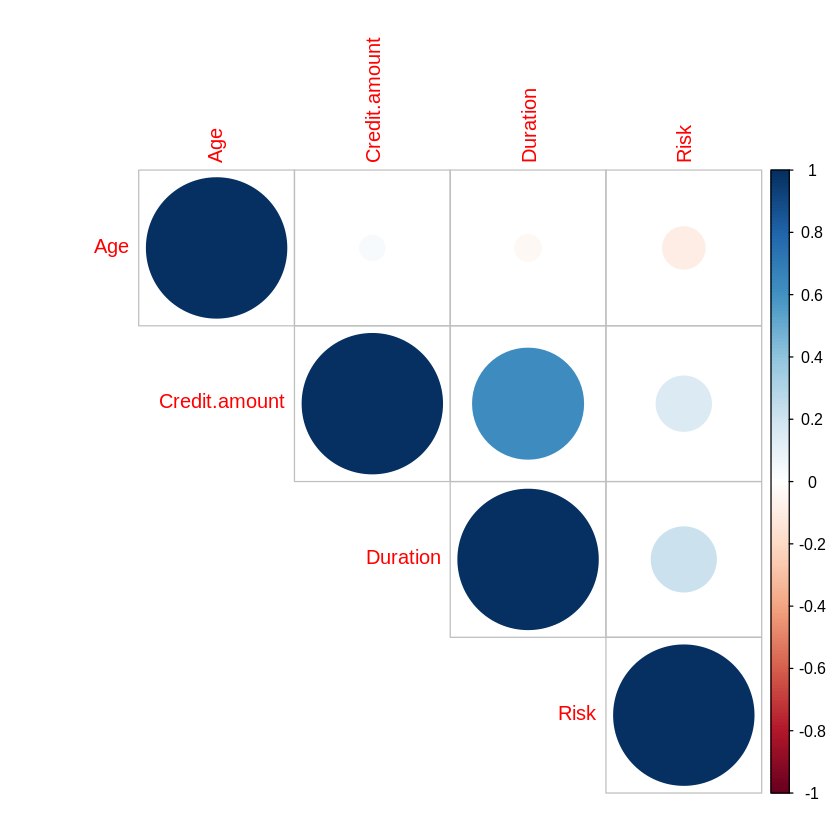

In [107]:
# Load necessary libraries
install.packages("corrplot")
library(corrplot)
library(stats)

# Define variables
variable <- "Age"
variable1 <- "Duration"
variable2 <- "Credit.amount"
t_variable <- "Risk"

# Define the Shapiro-Wilk test function with spacing
shapiro_test <- function(df, var, ct) {
    shapiro_test_result <- shapiro.test(df[[var]])
    cat("\n", ct, "\n")  # Space before the heading
    cat("Statistic:", shapiro_test_result$statistic, "\n")
    cat("P-value:", shapiro_test_result$p.value, "\n")
    cat("\n")  # Space after the test output
}

# Test headings
heading <- "Shapiro-Wilk test for Age"
heading1 <- "Shapiro-Wilk test for Duration"
heading2 <- "Shapiro-Wilk test for Credit.amount"
heading3 <- "Shapiro-Wilk test for Risk"

# Call the Shapiro-Wilk test with spacing
shapiro_test(data, variable, heading)
shapiro_test(data, variable1, heading1)
shapiro_test(data, variable2, heading2)
shapiro_test(data, t_variable, heading3)

# Define the Spearman correlation function with spacing
spearman_correlation <- function(df, cv, tv) {
    # Select numeric columns for correlation
    numeric_df <- df[, sapply(df, is.numeric)]

    # Pearson and Spearman correlations
    # pearson_correlation <- cor(numeric_df[[cv]], numeric_df[[tv]])
    spearman_correlation <- cor(numeric_df[[cv]], numeric_df[[tv]], method = "spearman")

    # Print correlations with spacing
    cat("\nSpearman correlation between", cv, "and", tv, ":", spearman_correlation, "\n")
    # cat("Pearson correlation between", cv, "and", tv, ":", pearson_correlation, "\n")
    cat("\n")  # Space after each correlation output

    # Plot the correlation matrix
    correlation_matrix <- cor(numeric_df)
    corrplot(correlation_matrix, method = "circle", type = "upper")
    cat("\n\n")  # Space after the correlation plot
}

# Call the Spearman correlation with spacing
spearman_correlation(data, "Age", t_variable)
spearman_correlation(data, "Duration", t_variable)
spearman_correlation(data, "Credit.amount", t_variable)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Age,Credit.amount,Duration,Risk
Age,1.00000000,0.03271642,-0.03613637,-0.09112741
Credit.amount,0.03271642,1.00000000,0.62498420,0.15473864
Duration,-0.03613637,0.62498420,1.00000000,0.21492667
Risk,-0.09112741,0.15473864,0.21492667,1.00000000


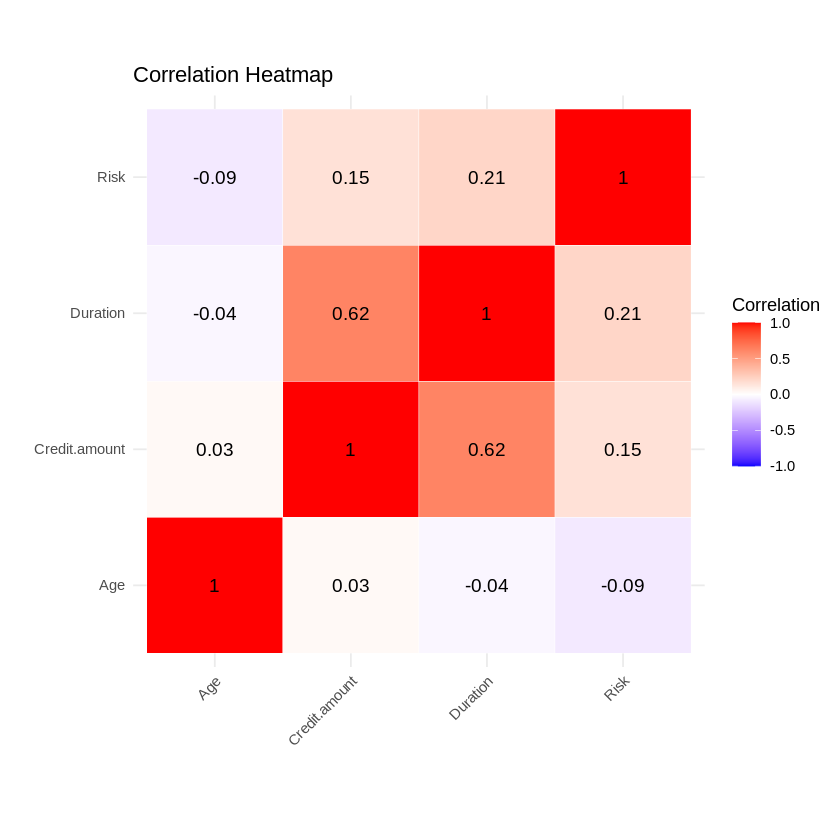

In [108]:
# Load necessary
install.packages("reshape2")
library(ggplot2)
library(reshape2)

# Correlation matrix
cor_matrix <- cor(data[,sapply(data, is.numeric)])
cor_matrix

# Select numeric columns
numeric_data <- data[, c("Age", "Credit.amount", "Duration",
                          "Risk")]

# Visualize the correlation matrix using ggplot2
cor_melted <- melt(cor_matrix)

ggplot(cor_melted, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1,1), space = "Lab",
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  coord_fixed() +
  labs(title = "Correlation Heatmap", x = "", y = "")


**MULTIVARIATE ANALYSIS**

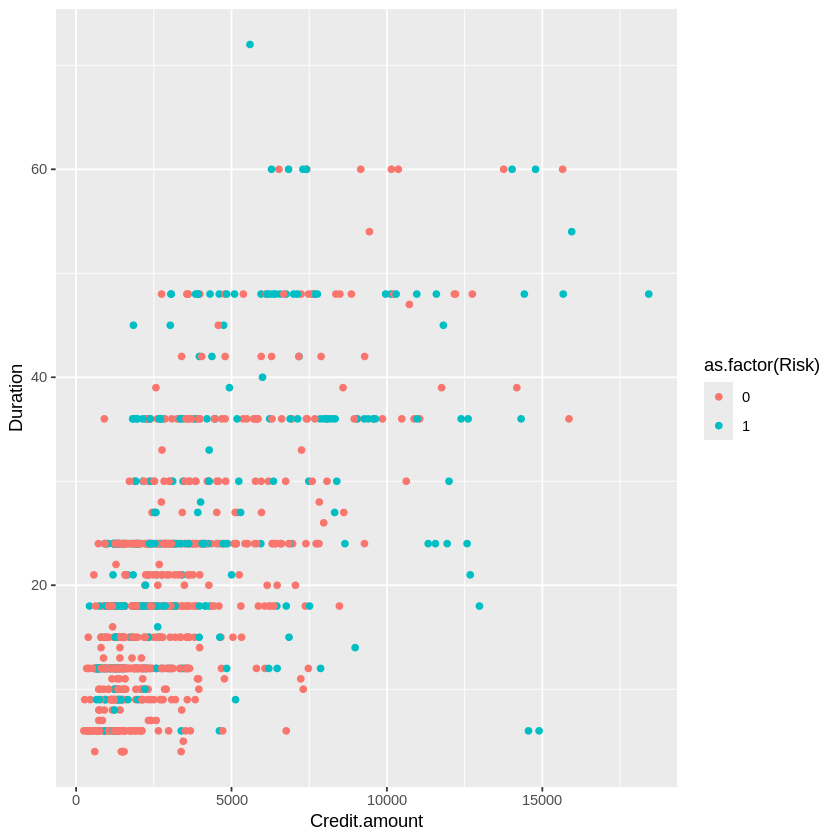

In [109]:
# Credit amount vs Duration
ggplot(data, aes(x=Credit.amount, y=Duration, color=as.factor(Risk))) + geom_point()

In [110]:
# Distribution of target variable
table(data$Risk)


  0   1 
700 300 

**Data Preprocessing**

In [111]:
# Convert categorical variables to factors
data$Sex <- as.factor(data$Sex)
data$Job <- as.factor(data$Job)
data$Housing <- as.factor(data$Housing)
data$Saving.accounts <- as.factor(data$Saving.accounts)
data$Checking.account <- as.factor(data$Checking.account)
data$Purpose <- as.factor(data$Purpose)

In [112]:
# Convert target variable to factor
data$Risk <- as.factor(data$Risk)
unique(data$Risk)
str(data$Risk)


[1] 0 1
Levels: 0 1

 Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 2 ...


In [113]:
# One-hot encoding for categorical variables
data <- model.matrix(~., data = data[,-10])[,-1]

In [114]:
data <- as.data.frame(data)
colnames(data)

colnames(data)[colnames(data) == "Risk1"] <- "Risk"
colnames(data)[colnames(data) == "Jobunskilled and non resident"] <- "Jobunskilled_and_non_resident"
colnames(data)[colnames(data) == "Saving.accountsquite rich"] <- "Saving.accountsquiterich"
head(data)

[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquite rich"    
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk1"

,Age,Sexmale,Jobskilled,Jobunskilled_and_non-resident,Housingown,Housingrent,Saving.accountsmoderate,Saving.accountsquiterich,Saving.accountsrich,Checking.accountmoderate,Checking.accountrich,Credit.amount,Duration,Risk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67,1,1,0,1,0,0,0,0,0,0,1169,6,0
2,22,0,1,0,1,0,0,0,0,1,0,5951,48,1
3,49,1,0,1,1,0,0,0,0,0,0,2096,12,0
4,45,1,1,0,0,0,0,0,0,0,0,7882,42,0
5,53,1,1,0,0,0,0,0,0,0,0,4870,24,1
6,35,1,0,1,0,0,0,0,0,1,0,9055,36,0


In [115]:
install.packages("smotefamily")

# Load the smotefamily package
library(smotefamily)

# Apply SMOTE to address imbalancing
# smote_data <- SMOTE(X = data[, -ncol(data)], target = data$Risk, K = 5)
smote_data <- SMOTE(X = data[, -which(colnames(data) == "Risk")], target = data$Risk, K = 7)
colnames(smote_data$data)[colnames(smote_data$data) == "class"] <- "Risk"


# Check new class distribution
table(smote_data$data$Risk)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




  0   1 
700 600 

In [116]:
colnames(smote_data$data)

# Convert the Risk column to factor with appropriate labels
smote_data$data$Risk <- factor(smote_data$data$Risk, levels = c(0, 1), labels = c("Low", "High"))

# Check the structure and unique values again
str(smote_data$data$Risk)
unique(smote_data$data$Risk)

[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

 Factor w/ 2 levels "Low","High": 2 2 2 2 2 2 2 2 2 2 ...


[1] High Low 
Levels: Low High

In [117]:
# Split the data into training and testing set
set.seed(123)
train_index <- sample(1:nrow(smote_data$data), 0.7*nrow(smote_data$data))
train_data <- smote_data$data[train_index,]
test_data <- smote_data$data[-train_index,]

In [118]:
colnames(train_data)
# colnames(train_data)[colnames(train_data) == "Risk1"] <- "Risk"
# colnames(train_data)[colnames(train_data) == "Jobunskilled and non resident"] <- "Jobunskilled_and_non_resident"
# colnames(train_data)[colnames(train_data) == "Saving.accountsquite rich"] <- "Saving.accountsquiterich"
head(train_data)
# sum(is.na(train_data$Jobunskilled_and_non-resident))



[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

,Age,Sexmale,Jobskilled,Jobunskilled_and_non-resident,Housingown,Housingrent,Saving.accountsmoderate,Saving.accountsquiterich,Saving.accountsrich,Checking.accountmoderate,Checking.accountrich,Credit.amount,Duration,Risk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
415,31.50462,0.07076888,1.0000000,0,0,1,0.07076888,0,0,0.07076888,0,1283.514,23.36308,High
463,40.85503,1.00000000,0.7855029,0,0,1,0.00000000,0,0,0.00000000,0,4843.214,19.72189,High
179,28.00000,1.00000000,1.0000000,0,1,0,0.00000000,0,0,0.00000000,0,2169.000,18.00000,High
526,25.68707,0.13741494,0.8625851,0,1,0,0.00000000,0,0,0.00000000,0,1833.351,21.41224,High
195,31.00000,1.00000000,1.0000000,0,1,0,0.00000000,0,0,0.00000000,0,6350.000,30.00000,High
938,38.00000,1.00000000,1.0000000,0,1,0,0.00000000,0,0,1.00000000,0,754.000,12.00000,Low


In [119]:
colnames(test_data)
# colnames(test_data)[colnames(test_data) == "Risk1"] <- "Risk"
# colnames(test_data)[colnames(test_data) == "Jobunskilled and non resident"] <- "Jobunskilled_and_non_resident"
# colnames(test_data)[colnames(test_data) == "Saving.accountsquite rich"] <- "Saving.accountsquiterich"
head(test_data)

[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

,Age,Sexmale,Jobskilled,Jobunskilled_and_non-resident,Housingown,Housingrent,Saving.accountsmoderate,Saving.accountsquiterich,Saving.accountsrich,Checking.accountmoderate,Checking.accountrich,Credit.amount,Duration,Risk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,24,0,1,0,1,0,0,0,0,0,0,3190,18,High
3,74,0,0,0,0,0,0,0,0,1,0,5129,9,High
4,26,1,1,0,1,0,0,0,0,0,0,3414,21,High
7,27,1,1,0,1,0,0,0,0,0,0,8648,24,High
12,60,1,1,0,1,0,0,0,0,0,0,2246,12,High
14,33,0,1,0,0,1,0,0,0,0,0,3966,18,High


**MODEL BUILDING AND EVALUTION**

In [120]:
unique(smote_data$data$Risk)
str(smote_data$data$Risk)

# str(train_data)

[1] High Low 
Levels: Low High

 Factor w/ 2 levels "Low","High": 2 2 2 2 2 2 2 2 2 2 ...


**Logistic Regression Model**

In [121]:

# Install the 'caret' package which contains the 'train' function
install.packages("caret")

# Load the 'caret' package to access the 'train' function
library(caret)

# Train a model (logistic regression) using the training data
model <- train(Risk ~ ., data = train_data, method = "glm")

# Verify the trained model
summary(model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
NULL

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                            8.583e-01  4.902e-01   1.751 0.079973
Age                                   -2.153e-02  7.397e-03  -2.910 0.003611
Sexmale                               -1.659e-01  1.667e-01  -0.995 0.319854
Jobskilled                            -4.558e-01  2.317e-01  -1.967 0.049207
`\\`Jobunskilled_and_non-resident\\``  1.052e-01  2.657e-01   0.396 0.692127
Housingown                            -6.721e-01  2.470e-01  -2.721 0.006512
Housingrent                           -2.182e-01  3.013e-01  -0.724 0.468949
Saving.accountsmoderate                1.059e-01  2.592e-01   0.409 0.682791
Saving.accountsquiterich              -5.144e-01  3.486e-01  -1.475 0.140112
Saving.accountsrich                   -8.581e-01  4.279e-01  -2.005 0.044911
Checking.accountmoderate              -6.320e-01  1.687e-01  -3.747 0.000179
Checking.accountrich                  -2.942e-01 

In [122]:
# Use the trained model to make predictions on the test data
predictions <- predict(model, test_data)


In [123]:
# Convert test_data to a data frame
test_data <- as.data.frame(test_data)

# Check if test_data is a data frame
str(test_data)


'data.frame':	391 obs. of  14 variables:
 $ Age                          : num  24 74 26 27 60 33 54 35 34 39 ...
 $ Sexmale                      : num  0 0 1 1 1 0 1 1 0 0 ...
 $ Jobskilled                   : num  1 0 1 1 1 1 0 1 0 1 ...
 $ Jobunskilled_and_non-resident: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Housingown                   : num  1 0 1 1 1 0 1 1 1 1 ...
 $ Housingrent                  : num  0 0 0 0 0 1 0 0 0 0 ...
 $ Saving.accountsmoderate      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Saving.accountsquiterich     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Saving.accountsrich          : num  0 0 0 0 0 0 1 0 0 0 ...
 $ Checking.accountmoderate     : num  0 1 0 0 0 0 1 0 1 1 ...
 $ Checking.accountrich         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Credit.amount                : num  3190 5129 3414 8648 2246 ...
 $ Duration                     : num  18 9 21 24 12 18 24 12 24 21 ...
 $ Risk                         : Factor w/ 2 levels "Low","High": 2 2 2 2 2 2 2 2 2 2 ...


In [124]:
# Check if the 'Risk' column exists in test_data
if ("Risk" %in% colnames(test_data)) {
    print("Risk column exists.")
} else {
    print("Risk column not found.")
}


# Convert predictions and test_data$Risk to factors with the same levels
predictions <- as.factor(predictions)
test_data$Risk <- as.factor(test_data$Risk)

# Ensure predictions and test_data$Risk have the same levels
common_levels <- unique(c(levels(predictions), levels(test_data$Risk)))

# Set the levels of both factors to the common levels
levels(predictions) <- common_levels
levels(test_data$Risk) <- common_levels



[1] "Risk column exists."


**Logistic Regression Hyperparameter Tuning And Performance**

In [125]:
colnames(test_data)
colnames(train_data)

#Change the column name 'Jobunskilled_and_non-resident'
colnames(test_data) <- gsub("-", "_", colnames(test_data))
colnames(train_data) <- gsub("-", "_", colnames(train_data))

# Verify the column name has been changed
print(colnames(test_data))
print(colnames(train_data))

[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non-resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

 [1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non_resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"                         
 [1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non_resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"                         


In [144]:
install.packages("caret")
install.packages("glmnet")
library(caret)
library(glmnet)

# Normalizing the data before training the model
pre_process <- preProcess(train_data, method = c("center", "scale"))
train_data_norm <- predict(pre_process, train_data)
test_data_norm <- predict(pre_process, test_data)

# Define the logistic regression model with L1 (lasso) or L2 (ridge) penalties
set.seed(123)
logreg_ctrl <- trainControl(method = "cv", number = 5)

# Define the grid of hyperparameters to search
logreg_grid <- expand.grid(
  alpha = seq(0, 1, by = 0.25),   # alpha = 0 (ridge), alpha = 1 (lasso)
  lambda = seq(0.0001, 0.1, by = 0.005)  # Regularization strength (lambda)
)

# Train the model using grid search
logreg_model <- train(
  Risk ~ .,  # Replace `Risk` with your target variable
  data = train_data_norm,  # Use your training dataset here
  method = "glmnet",
  trControl = logreg_ctrl,
  tuneGrid = logreg_grid
)

# Get the best hyperparameters
print(logreg_model$bestTune)

# Make predictions and evaluate
pred_logreg <- predict(logreg_model, newdata = test_data_norm)

# Convert predictions and test_data$Risk to factors with the same levels
all_levels <- unique(c(as.character(pred_logreg), as.character(test_data$Risk)))


# Convert both to factors with all_levels
pred_logreg <- factor(pred_logreg, levels = all_levels)
test_data$Risk <- factor(test_data$Risk, levels = all_levels)


# Compute confusion matrix directly
confusion_matrix <- confusionMatrix(pred_logreg, test_data$Risk)

# Extract metrics
accuracy <- confusion_matrix$overall["Accuracy"]
precision <- confusion_matrix$byClass["Pos Pred Value"]  # Precision
recall <- confusion_matrix$byClass["Sensitivity"]  # Recall
f1_score <- confusion_matrix$byClass["F1"]

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1-score:", f1_score, "\n")




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



   alpha lambda
22  0.25 0.0051
Accuracy: 0.5959079 
Precision: 0.5542857 
Recall: 0.5480226 
F1-score: 0.5511364 


**Decision Tree Model**

In [ ]:
## Load the necessary library for decision trees
library(rpart)

# Convert train_data to a data frame if it's not already
train_data <- as.data.frame(train_data)

# Train a decision tree model using the training data
decision_tree_model <- rpart(Risk ~ ., data = train_data, method = "class")

# Check the decision tree model
print(decision_tree_model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



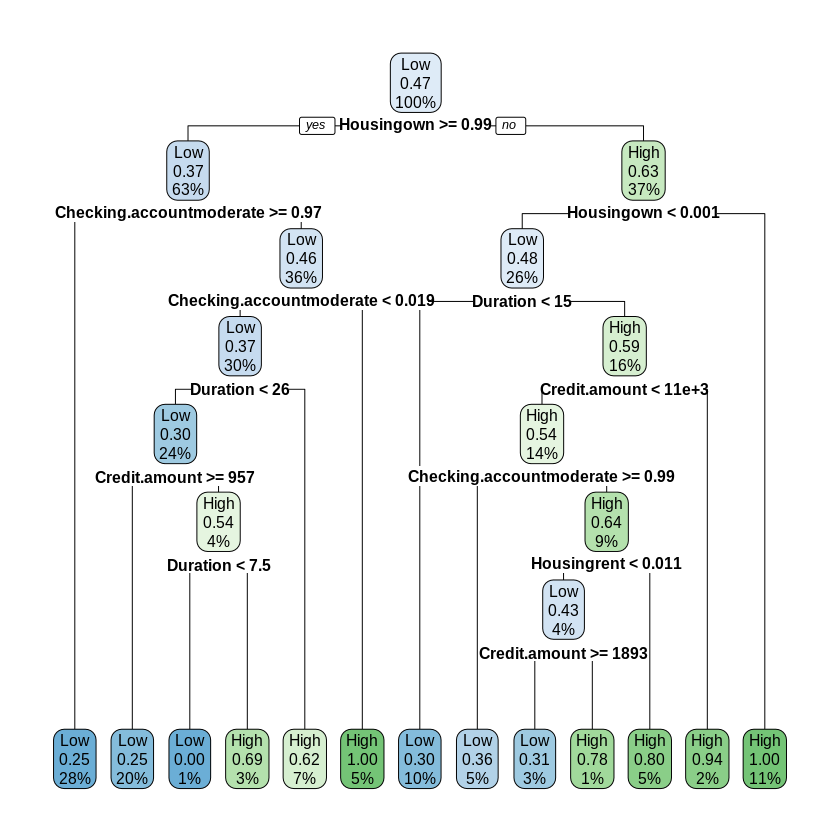

In [146]:
# Visualize the decision tree
install.packages("rpart.plot")
library(rpart.plot)
rpart.plot(decision_tree_model)

In [149]:
# Make predictions on the test data using the decision tree
decision_tree_predictions <- predict(decision_tree_model, test_data, type = "class")

**Decision Tree Performance**

In [150]:
# Load the library for evaluation metrics
library(caret)

# Create a confusion matrix to evaluate the decision tree model
dc <- confusionMatrix(decision_tree_predictions, test_data$Risk)
dc


Warning message in confusionMatrix.default(decision_tree_predictions, test_data$Risk):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   93  36
      Low    84 178
                                          
               Accuracy : 0.6931          
                 95% CI : (0.6448, 0.7385)
    No Information Rate : 0.5473          
    P-Value [Acc > NIR] : 2.678e-09       
                                          
                  Kappa : 0.3658          
                                          
 Mcnemar's Test P-Value : 1.783e-05       
                                          
            Sensitivity : 0.5254          
            Specificity : 0.8318          
         Pos Pred Value : 0.7209          
         Neg Pred Value : 0.6794          
             Prevalence : 0.4527          
         Detection Rate : 0.2379          
   Detection Prevalence : 0.3299          
      Balanced Accuracy : 0.6786          
                                          
       'Positive' Class : High            
                           

**Decision Tree Hyperparameter Tuning And Performance**

In [155]:
# Install the required libraries
install.packages("rpart")
library(rpart)

# Define the decision tree control for cross-validation
set.seed(123)
dtree_ctrl <- trainControl(method = "cv", number = 10)

# Define the grid of hyperparameters to search
dtree_grid <- expand.grid(
  cp = seq(0.001, 0.05, by = 0.005)  # Complexity parameter (pruning)
)

# Train the model using grid search
dtree_model <- train(
  Risk ~ .,
  data = train_data,
  method = "rpart",
  trControl = dtree_ctrl,
  tuneGrid = dtree_grid
)

# Get the best hyperparameters
print(dtree_model$bestTune)

# Make predictions and evaluate
pred_dtree <- predict(dtree_model, newdata = test_data)
confusionMatrix(pred_dtree, test_data$Risk)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



     cp
3 0.011


Warning message in confusionMatrix.default(pred_dtree, test_data$Risk):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction High Low
      High   93  36
      Low    84 178
                                          
               Accuracy : 0.6931          
                 95% CI : (0.6448, 0.7385)
    No Information Rate : 0.5473          
    P-Value [Acc > NIR] : 2.678e-09       
                                          
                  Kappa : 0.3658          
                                          
 Mcnemar's Test P-Value : 1.783e-05       
                                          
            Sensitivity : 0.5254          
            Specificity : 0.8318          
         Pos Pred Value : 0.7209          
         Neg Pred Value : 0.6794          
             Prevalence : 0.4527          
         Detection Rate : 0.2379          
   Detection Prevalence : 0.3299          
      Balanced Accuracy : 0.6786          
                                          
       'Positive' Class : High            
                           

**Random Forest Model**

In [156]:
colnames(train_data)

# Check levels of the 'Job' or similar column to see if 'Jobunskilled_and_non-resident' is present
# levels(train_data$'Jobunskilled_and_non-resident')
# Replace hyphen with underscore in the column name
colnames(train_data) <- gsub("-", "_", colnames(train_data))

# Verify the column name has been changed
print(colnames(train_data))


[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non_resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

 [1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non_resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"                         


In [157]:
install.packages("randomForest")
library(randomForest)

rf_model <- randomForest(Risk ~ ., data = train_data, ntree = 100, mtry = 2, importance = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [137]:
colnames(train_data)


[1] "Age"                           "Sexmale"                      
 [3] "Jobskilled"                    "Jobunskilled_and_non_resident"
 [5] "Housingown"                    "Housingrent"                  
 [7] "Saving.accountsmoderate"       "Saving.accountsquiterich"     
 [9] "Saving.accountsrich"           "Checking.accountmoderate"     
[11] "Checking.accountrich"          "Credit.amount"                
[13] "Duration"                      "Risk"

**Random Forest Performance**

In [158]:
# Confusion matrix to evaluate accuracy
confusion_matrix <- table(test_data$Risk, predictions)
print(confusion_matrix)



      predictions
       Low High
  High  80   97
  Low  135   79


In [159]:
# Calculate accuracy
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("Accuracy:", accuracy, "\n")

Accuracy: 0.4066496 


,Low,High,MeanDecreaseAccuracy,MeanDecreaseGini
Age,1.5469863,1.542452,2.361590,33.767891
Sexmale,5.4226881,3.215833,6.486584,16.393367
Jobskilled,8.3324797,4.956310,9.553275,20.112794
Jobunskilled_and_non_resident,7.8291243,4.455994,9.833996,12.593303
Housingown,11.4731092,2.862695,11.498136,24.826621
Housingrent,7.5433872,-2.080343,6.814482,13.472865
Saving.accountsmoderate,2.5607560,2.532481,3.756169,8.417485
Saving.accountsquiterich,1.0103636,4.939060,3.993581,5.581016
Saving.accountsrich,-0.1247190,5.297669,3.245924,5.047378
Checking.accountmoderate,10.9458696,10.373818,12.599860,35.434519


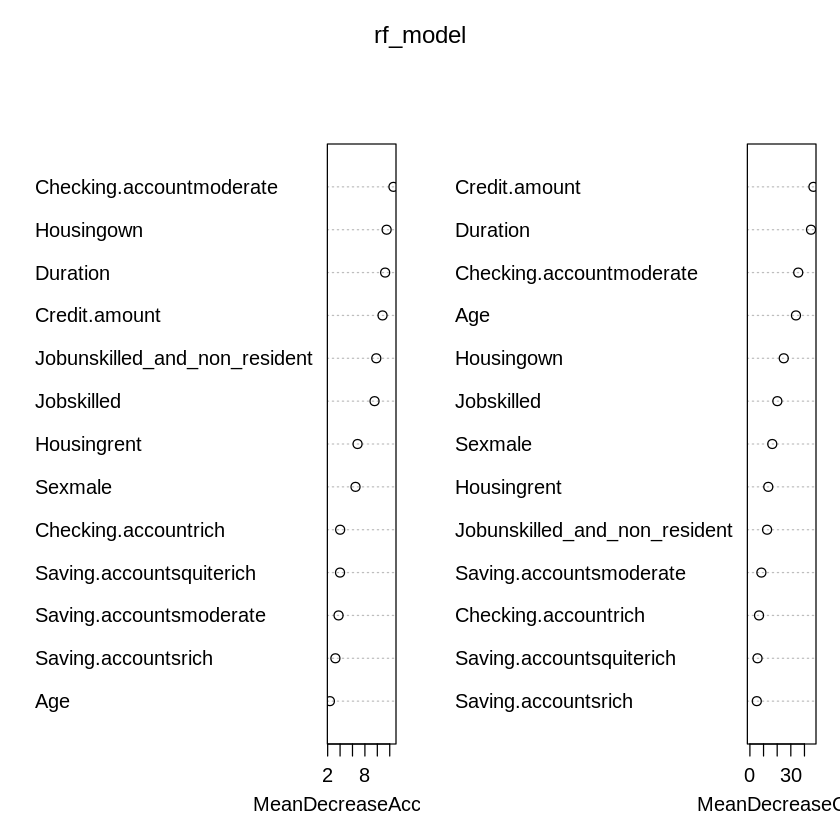

In [160]:
# Variable importance
importance(rf_model)
varImpPlot(rf_model)


**Random Forest Hyperparameter Tuning And Performance**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



  mtry
2    3


Warning message in confusionMatrix.default(pred_rf, test_data$Risk):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction High Low
      High  101  28
      Low    76 186
                                          
               Accuracy : 0.734           
                 95% CI : (0.6873, 0.7772)
    No Information Rate : 0.5473          
    P-Value [Acc > NIR] : 2.185e-14       
                                          
                  Kappa : 0.4503          
                                          
 Mcnemar's Test P-Value : 4.051e-06       
                                          
            Sensitivity : 0.5706          
            Specificity : 0.8692          
         Pos Pred Value : 0.7829          
         Neg Pred Value : 0.7099          
             Prevalence : 0.4527          
         Detection Rate : 0.2583          
   Detection Prevalence : 0.3299          
      Balanced Accuracy : 0.7199          
                                          
       'Positive' Class : High            
                           

,MeanDecreaseGini
Age,52.755895
Sexmale,19.783049
Jobskilled,25.003612
Jobunskilled_and_non_resident,13.510632
Housingown,29.296744
Housingrent,15.883842
Saving.accountsmoderate,9.428007
Saving.accountsquiterich,5.889867
Saving.accountsrich,5.105244
Checking.accountmoderate,40.318116


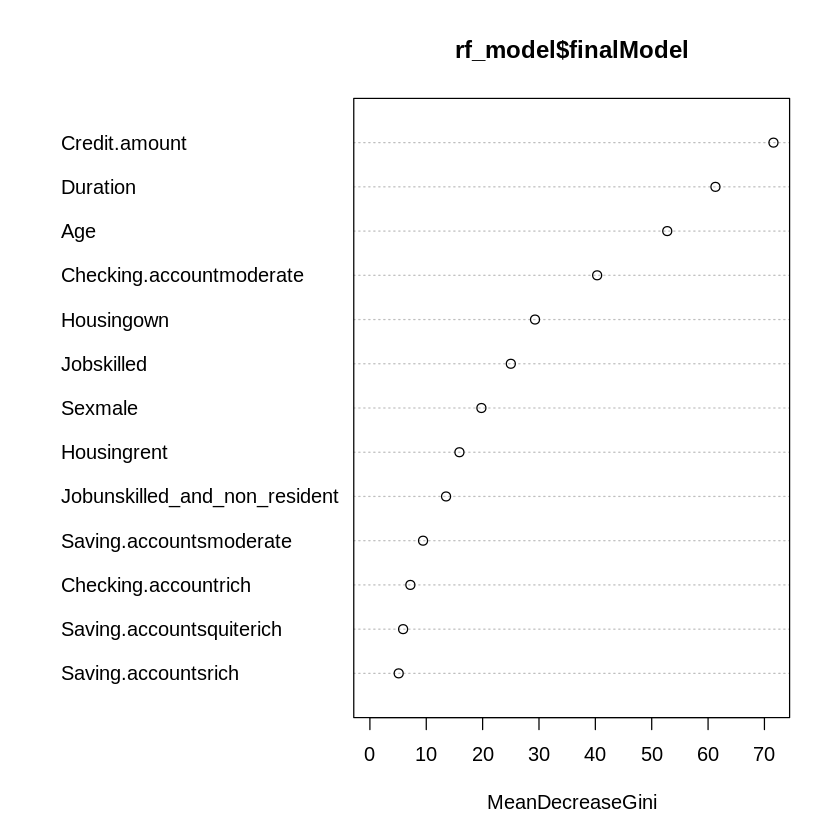

In [169]:
# Install the required libraries
install.packages("randomForest")
install.packages("caret")
library(randomForest)
library(caret)

# Define the random forest control for cross-validation
set.seed(123)
rf_ctrl <- trainControl(method = "cv", number = 5)

# Define the grid of hyperparameters to search
# Grid only includes 'mtry' as Random Forest tuning grid focuses on 'mtry'
rf_grid <- expand.grid(
  mtry = c(2, 3, 4)

)

# Train the model using grid search
rf_model <- train(
  Risk ~ .,
  data = train_data,
  method = "rf",
  trControl = rf_ctrl,
  tuneGrid = rf_grid,
  ntree = 500
)

# Get the best hyperparameters
print(rf_model$bestTune)

# Make predictions and evaluate
pred_rf <- predict(rf_model, newdata = test_data)

# Confusion Matrix to evaluate accuracy
confusion_matrix <- confusionMatrix(pred_rf, test_data$Risk)
print(confusion_matrix)

#Variable importance
importance(rf_model$finalModel)
varImpPlot(rf_model$finalModel)

